In [1]:
import torch
from torchvision import datasets , transforms
from torch.utils.data import DataLoader

# Define transformations for training, validation, and testing datasets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization values from ImageNet
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization values from ImageNet
])

# Load datasets
train_dir = f'/kaggle/input/dry-fruit-classification-split/Split_Dataset/train'
val_dir = f"/kaggle/input/dry-fruit-classification-split/Split_Dataset/val"

train_dataset = datasets.ImageFolder(root= train_dir , transform=train_transforms)
val_dataset = datasets.ImageFolder(root= val_dir , transform=val_test_transforms)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True ,  drop_last = True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False , drop_last = True)


In [2]:
import torch
from torch import nn

num_classes = 4

model = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_0', pretrained=True)
model.classifier = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Conv2d(512, num_classes , kernel_size=(1, 1), stride=(1, 1)),  # Adjust num_classes here
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling to output 1x1 feature map
)


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 56.8MB/s]


In [3]:
### Model Architecture
model  

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [4]:
# import torch
# from torch import nn, optim
# from tqdm import tqdm


# # Loss function and optimizer (only for the last layer if everything else is frozen)
# criterion = nn.CrossEntropyLoss()  # For multi-class classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Move the model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print( f"Traning On :{device}")
# model.to(device)

# # Training loop
# num_epochs = 100  # Set your desired number of epochs
# from tqdm import tqdm

# # Training loop with accuracy calculation
# best_accuracy = 0
# for epoch in range(num_epochs):


    
#     model.train()  # Set the model to training mode
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     # Use tqdm for tracking batches inside the epoch
#     progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    
#     for images, labels in progress_bar:
#         # Move data to GPU if available
#         images, labels = images.to(device), labels.to(device)
        
#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         # Accumulate loss
#         running_loss += loss.item()
        
#         # Predictions and accuracy calculation
#         _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
#         total += labels.size(0)  # Keep track of total samples
#         correct += (predicted == labels).sum().item()  # Count correct predictions
        
#         # Update the progress bar description with current loss
#         progress_bar.set_postfix(loss=running_loss/len(train_loader))
    
#     # Calculate final loss and accuracy after each epoch
#     epoch_loss = running_loss / len(train_loader)
#     accuracy = 100 * correct / total
    
#     # Print final loss and accuracy after each epoch
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

#     if accuracy > best_accuracy :
#         torch.save(model.state_dict(), f"ep:{epoch}_acc:{accuracy:.2f}.pth") 
#         print( f"Best Model Saved. Last Best Accuracy: {best_accuracy}. Epoch:{epoch} Accuracy:{accuracy} Loss:{epoch_loss}")
#         best_accuracy = accuracy 
        





Training on: cuda


Epoch 1/15: 100%|██████████| 251/251 [01:18<00:00,  3.21it/s, loss=0.114] 


Epoch [1/15], Loss: 0.1138, Accuracy: 95.33% | Val Loss: 0.0162, Val Accuracy: 99.57%
Best model saved with validation accuracy: 99.57% at epoch 1


Epoch 2/15: 100%|██████████| 251/251 [01:20<00:00,  3.12it/s, loss=0.116] 


Epoch [2/15], Loss: 0.1155, Accuracy: 95.72% | Val Loss: 0.0201, Val Accuracy: 99.48%


Epoch 3/15: 100%|██████████| 251/251 [01:14<00:00,  3.37it/s, loss=0.116] 


Epoch [3/15], Loss: 0.1160, Accuracy: 95.46% | Val Loss: 0.0168, Val Accuracy: 99.57%


Epoch 4/15: 100%|██████████| 251/251 [01:15<00:00,  3.32it/s, loss=0.106] 


Epoch [4/15], Loss: 0.1060, Accuracy: 96.00% | Val Loss: 0.0173, Val Accuracy: 99.57%


Epoch 5/15: 100%|██████████| 251/251 [01:14<00:00,  3.36it/s, loss=0.101] 


Epoch [5/15], Loss: 0.1008, Accuracy: 96.22% | Val Loss: 0.0147, Val Accuracy: 99.57%


Epoch 6/15: 100%|██████████| 251/251 [01:15<00:00,  3.34it/s, loss=0.0962]


Epoch [6/15], Loss: 0.0962, Accuracy: 96.38% | Val Loss: 0.0134, Val Accuracy: 99.48%


Epoch 7/15: 100%|██████████| 251/251 [01:18<00:00,  3.20it/s, loss=0.0977]


Epoch [7/15], Loss: 0.0977, Accuracy: 96.08% | Val Loss: 0.0228, Val Accuracy: 99.48%


Epoch 8/15: 100%|██████████| 251/251 [01:31<00:00,  2.73it/s, loss=0.0924]


Epoch [8/15], Loss: 0.0924, Accuracy: 96.53% | Val Loss: 0.0191, Val Accuracy: 99.39%


Epoch 9/15: 100%|██████████| 251/251 [01:15<00:00,  3.33it/s, loss=0.0981]


Epoch [9/15], Loss: 0.0981, Accuracy: 96.22% | Val Loss: 0.0299, Val Accuracy: 98.87%


Epoch 10/15: 100%|██████████| 251/251 [01:17<00:00,  3.23it/s, loss=0.0923]


Epoch [10/15], Loss: 0.0923, Accuracy: 96.24% | Val Loss: 0.0184, Val Accuracy: 99.48%


Epoch 11/15: 100%|██████████| 251/251 [01:24<00:00,  2.98it/s, loss=0.098] 


Epoch [11/15], Loss: 0.0980, Accuracy: 95.93% | Val Loss: 0.0135, Val Accuracy: 99.57%


Epoch 12/15: 100%|██████████| 251/251 [01:22<00:00,  3.05it/s, loss=0.0907]


Epoch [12/15], Loss: 0.0907, Accuracy: 96.70% | Val Loss: 0.0152, Val Accuracy: 99.48%


Epoch 13/15: 100%|██████████| 251/251 [01:19<00:00,  3.16it/s, loss=0.0857]


Epoch [13/15], Loss: 0.0857, Accuracy: 96.68% | Val Loss: 0.0168, Val Accuracy: 99.48%


Epoch 14/15: 100%|██████████| 251/251 [01:39<00:00,  2.53it/s, loss=0.0934]


Epoch [14/15], Loss: 0.0934, Accuracy: 96.36% | Val Loss: 0.0209, Val Accuracy: 99.39%


Epoch 15/15: 100%|██████████| 251/251 [01:21<00:00,  3.10it/s, loss=0.0971]


Epoch [15/15], Loss: 0.0971, Accuracy: 96.13% | Val Loss: 0.0185, Val Accuracy: 99.48%


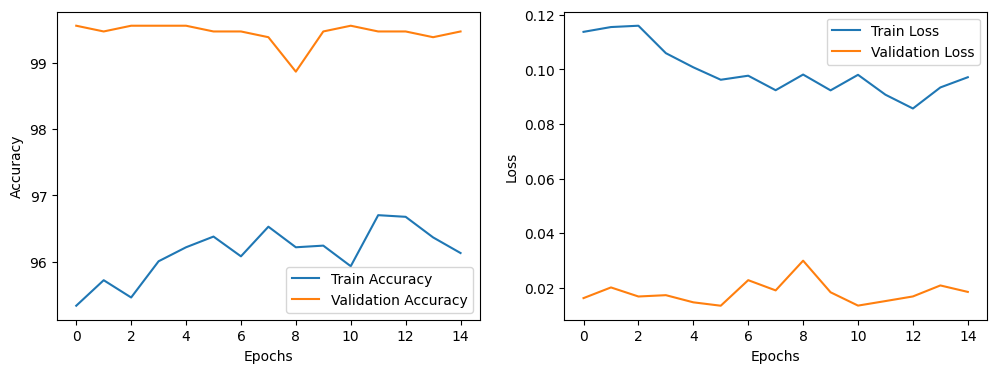

In [12]:
import torch
from torch import nn, optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Loss function and optimizer (only for the last layer if everything else is frozen)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")
model.to(device)

# Training loop
num_epochs = 15  # Set your desired number of epochs

# For tracking accuracy and loss
train_acc_history = []
val_acc_history = []
train_loss_history = []
val_loss_history = []

best_accuracy = 0

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Use tqdm for tracking batches inside the epoch
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    
    for images, labels in progress_bar:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
        
        # Predictions and accuracy calculation
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        # Update the progress bar description with current loss
        progress_bar.set_postfix(loss=running_loss/len(train_loader))
    
    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    
    # Append for later plotting
    train_acc_history.append(train_accuracy)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    # Calculate validation accuracy and loss
    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    
    # Append for later plotting
    val_acc_history.append(val_accuracy)
    val_loss_history.append(val_loss)
    
    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}% | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    # Save the best model
    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), f"best_model_epoch_{epoch+1}_val_acc_{val_accuracy:.2f}.pth")
        print(f"Best model saved with validation accuracy: {val_accuracy:.2f}% at epoch {epoch+1}")
        best_accuracy = val_accuracy

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the same transformations as used for validation/test
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size as during training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

# Define the path for the test dataset
test_dir = f'/kaggle/input/dry-fruit-classification-split/Split_Dataset/test'

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

# Print the size of the test dataset
print(f"Test dataset has {len(test_dataset)} samples.")


Test dataset has 2308 samples.


In [14]:
# Function to test the best saved model on the test dataset
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy

# Load the best saved model
best_model_path = "/kaggle/working/best_model_epoch_1_val_acc_99.57.pth"  # Use the path of the best saved model
model.load_state_dict(torch.load(best_model_path))
model.to(device)

# Test the model on the test dataset
print("Testing the best model on the test set...")
test_model(model, test_loader, device)


/tmp/ipykernel_30/3224179035.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Testing the best model on the test set...
Test Accuracy: 99.44%


99.43576388888889